In [8]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import ipywidgets as w

In [9]:
metro = pd.DataFrame()

In [24]:
metro = pd.read_csv('metro.csv').set_index('Unnamed: 0').reindex(np.arange(1987,2023)).fillna(method='ffill').reset_index()
cols = {'Unnamed: 0':'Date', 'variable':'Stations', 'value':'Ticket Price (L.E)'}
data = metro.melt(id_vars = 'Unnamed: 0').rename(cols)
data.columns = cols.values()

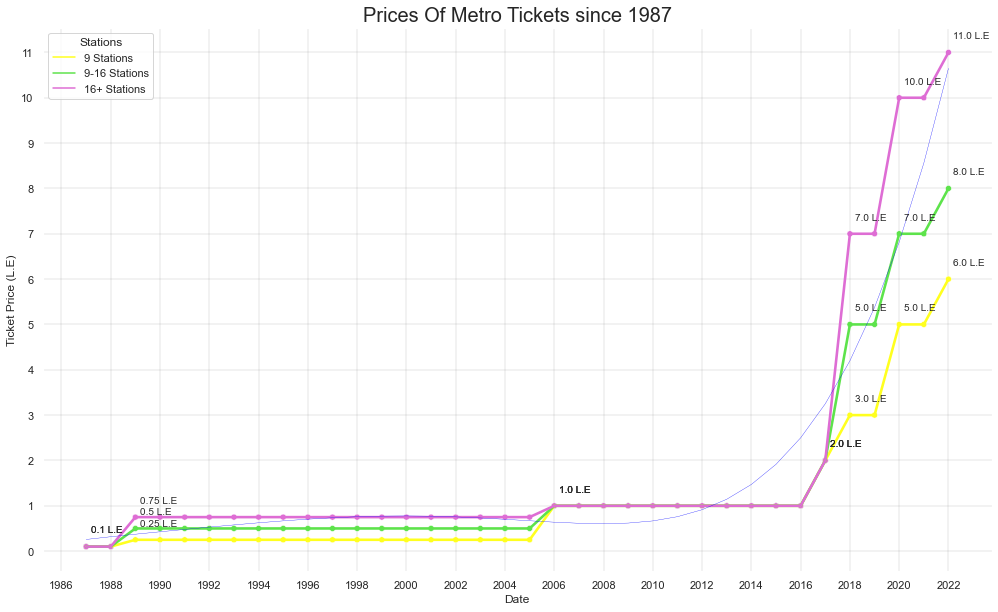

In [77]:
avgs = metro.set_index('Unnamed: 0').iloc[:,1:].mean(axis = 1)
coefficients = np.polyfit(np.arange(36),avgs,deg = 5)
poly = np.poly1d(coefficients)
new_x = np.arange(36)
new_y = poly(new_x)
plt.figure(figsize=(17, 10))
plt.xticks(np.arange(1986,2023,2))
plt.yticks(np.arange(0,15))
plt.grid(linewidth = 0.2,color = 'grey')
sns.set(rc={'axes.facecolor':'ffffff', 'figure.facecolor':'ffffff'})
plt.title('Prices Of Metro Tickets since 1987', fontdict = {'fontsize': 20})
sns.lineplot(data = data, x= 'Date', y= 'Ticket Price (L.E)',hue = 'Stations', palette = ['#ffff1f','#5de34b','#de6dd4'], linewidth = 2.6)
sns.scatterplot(data = data, x= 'Date', y= 'Ticket Price (L.E)',hue = 'Stations', palette = ['#ffff1f','#5de34b','#de6dd4'], legend = False)

x_offset = 0.2
y_offset = 0.2
old_date = data['Date'][0]
old_price = data['Ticket Price (L.E)'][0]
for date, price in zip(data['Date'], data['Ticket Price (L.E)']):
    if (price != old_price):
        plt.text(date+x_offset, price + 0.3, str(price) +' L.E', fontweight =100, size= 10)
    old_date = date 
    old_price = price

plt.plot(new_x+1987, new_y, color = 'blue', linewidth = 0.3);